### Goal

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pandas as pd

import matplotlib.pyplot as plt

import plotting as plotting

### TODO: update this

In [3]:
date = "24-12-12"
pathfile = f"Pulling data/{date}/triple/"

### From here; automatic run

In [4]:
root = f"/Users/michaelmoret/Library/CloudStorage/GoogleDrive-michael@externa.bio/.shortcut-targets-by-id/1BdUNsBjDh5Gee_76jCiKB1C_CwG0ercP/{pathfile}"

MODE = "triple"
min_break_extension=40

In [5]:
if not root.endswith("/"):
    root += "/"

In [6]:
sep_category = "$" # separates categories like date, experiments, etc
sep_count = "%" # separated the number of hairs by experiment

In [7]:
for file in os.listdir(root):
    if file.endswith(".txt"):
        print(file)

20241212$IHNY$25%AActrl$25% KPMI NPYS 0.01$25%KPMI NPYS 0.03$25% KPMI NPYS 0.05$triple.txt
20241212$IHNY$25%AActrl$25% KPM2 NPYS 0.01$25%KPM2 NPYS 0.03$25% KPM2 NPYS 0.05$triple.txt
20241212$IHNY$25%phosctrl$25% KPMI NPYS 0.01$25%KPMI NPYS 0.03$25% KPMI NPYS 0.05$triple.txt
20241212$IHNY$25%phosctrl$25% KPM2 NPYS 0.01$25%KPM2 NPYS 0.03$25% KPM2 NPYS 0.05$triple.txt


In [8]:
savepath = f"{root}plots/"
os.makedirs(savepath, exist_ok=True)

In [9]:
all_dfs = []
# we add a prefix to name, so if two experiments have the same name in two files
# that are plotted together, they don't get merge because of the same name
prefix = "A"
for file in os.listdir(root):
    if file.endswith(".txt"):
        print(file)
        df = plotting.get_df_from_file(root + file,
                                       skip=2)

        # clean the df
        if MODE in file:
            df = plotting.clean_triple(df)
            assert "triple" in file
        else:
            raise ValueError(f"Not a {MODE} experiment")
        
        splitted_name = file.split(sep_category)
        # get the experiments; i.e. not the date
        # not the single or triple
        splitted_name = splitted_name[2:-1]
        # add the experiment name in the dataframe
        all_names = []
        for entries in splitted_name:
            times_name = entries.split(sep_count)
            _times = int(times_name[0])
            _name = times_name[1]
            _name = prefix + "_" + _name
            all_names += [_name] * _times
        df["Name"] = all_names
        # remove nan
        df = df.dropna()
        # remove all the break extension below threshold 
        df = df[df['BREAK EXT'] >= min_break_extension]
        
        all_dfs.append(df)

        # update prefix
        prefix = chr(ord(prefix) + 1)
        
# merge df
df_merged = pd.concat(all_dfs)
df_merged.head(5)

20241212$IHNY$25%AActrl$25% KPMI NPYS 0.01$25%KPMI NPYS 0.03$25% KPMI NPYS 0.05$triple.txt
20241212$IHNY$25%AActrl$25% KPM2 NPYS 0.01$25%KPM2 NPYS 0.03$25% KPM2 NPYS 0.05$triple.txt
20241212$IHNY$25%phosctrl$25% KPMI NPYS 0.01$25%KPMI NPYS 0.03$25% KPMI NPYS 0.05$triple.txt
20241212$IHNY$25%phosctrl$25% KPM2 NPYS 0.01$25%KPM2 NPYS 0.03$25% KPM2 NPYS 0.05$triple.txt


,RECORD,CROSS-SECTIONAL AREA,MEAN DIAMETER,MAX DIAMETER,MIN DIAMETER,ELASTIC EMOD,ELASTIC GRADIENT,ELASTIC EXT,ELASTIC STRESS,PLATEAU LOAD,...,STRESS 25%,WORK 25%,YIELD EXT,POSTYIELD GRADIENT,BREAK EXT,BREAK LOAD,BREAK STRESS,TOTAL WORK,TOUGHNESS,Name
0,1.0,3752.1,72.2,86.3,55.4,4.176,52.89,3.21,0.01421,54.08,...,0.01455,0.003804,30.00,2.831,58.21,79.75,208.391313,0.010380,91590000.0,A_AActrl
1,2.0,5170.6,82.2,95.6,68.9,3.300,56.90,3.73,0.01338,70.97,...,0.01392,0.004969,30.52,4.260,58.00,114.40,217.021165,0.014270,90290000.0,A_AActrl
2,3.0,5295.5,82.3,94.3,71.5,3.682,65.92,4.18,0.01282,70.42,...,0.01344,0.004750,28.66,4.096,54.20,103.70,191.916141,0.012230,76580000.0,A_AActrl
3,4.0,3574.6,69.4,80.7,56.4,4.055,49.04,2.99,0.01346,50.72,...,0.01491,0.003596,21.61,3.796,41.75,72.70,199.467261,0.006699,62190000.0,A_AActrl
4,5.0,5758.3,84.7,94.2,77.8,3.749,72.83,3.08,0.01216,73.02,...,0.01314,0.005172,23.80,5.082,45.81,106.10,180.638493,0.010720,61640000.0,A_AActrl


Statistical significance between D_phosctrl and D_ KPM2 NPYS 0.05: p = 0.0394
Statistical significance between D_ KPM2 NPYS 0.01 and D_ KPM2 NPYS 0.05: p = 0.0107
0 removed data points for MEAN DIAMETER


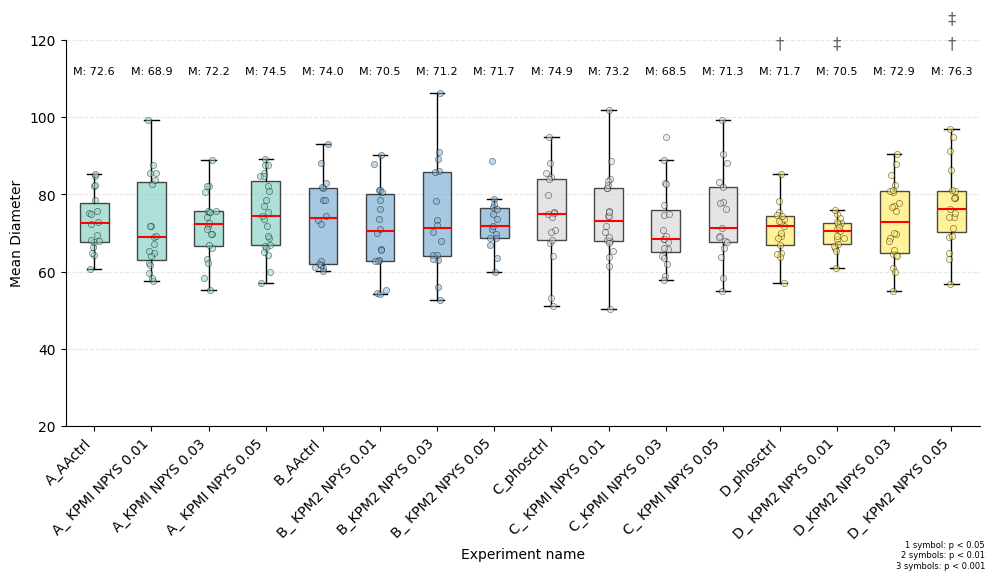

In [10]:
header = 'MEAN DIAMETER'
ymin = 20
ymax = 120
fig, ax, removed = plotting.create_boxplot(df_merged, header, ymin, ymax)
#save removed data
removed.to_csv(f"{savepath}{header}_removed.csv", index=True)
print(f"{len(removed)} removed data points for {header}")
# plot
fig.savefig(f"{savepath}{header}.png")
plt.show()

Statistical significance between A_ KPMI NPYS 0.01 and B_ KPM2 NPYS 0.05: p = 0.0249
Statistical significance between A_ KPMI NPYS 0.01 and C_ KPMI NPYS 0.01: p = 0.0187
Statistical significance between A_KPMI NPYS 0.03 and B_ KPM2 NPYS 0.05: p = 0.0355
Statistical significance between A_KPMI NPYS 0.03 and C_ KPMI NPYS 0.01: p = 0.0441
Statistical significance between A_ KPMI NPYS 0.05 and B_ KPM2 NPYS 0.05: p = 0.0250
Statistical significance between A_ KPMI NPYS 0.05 and C_ KPMI NPYS 0.01: p = 0.0495
Statistical significance between B_AActrl and B_ KPM2 NPYS 0.05: p = 0.0500
Statistical significance between B_ KPM2 NPYS 0.01 and B_ KPM2 NPYS 0.05: p = 0.0199
Statistical significance between B_ KPM2 NPYS 0.05 and C_KPMI NPYS 0.03: p = 0.0249
Statistical significance between B_ KPM2 NPYS 0.05 and D_phosctrl: p = 0.0047
Statistical significance between C_ KPMI NPYS 0.01 and C_KPMI NPYS 0.03: p = 0.0216
Statistical significance between C_ KPMI NPYS 0.01 and D_phosctrl: p = 0.0112
0 remov

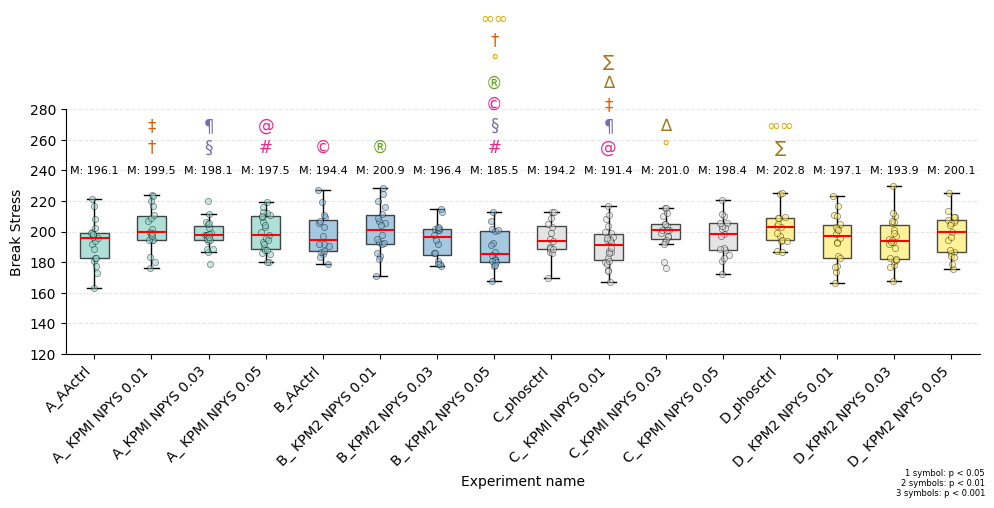

In [11]:
header = 'BREAK STRESS'
ymin = 120
ymax = 280
fig, ax, removed = plotting.create_boxplot(df_merged, header, ymin, ymax)
#save removed data
removed.to_csv(f"{savepath}{header}_removed.csv", index=True)
print(f"{len(removed)} removed data points for {header}")
# plot
fig.savefig(f"{savepath}{header}.png")
plt.show()

Statistical significance between A_ KPMI NPYS 0.01 and B_ KPM2 NPYS 0.05: p = 0.0417
Statistical significance between A_ KPMI NPYS 0.01 and C_ KPMI NPYS 0.01: p = 0.0254
Statistical significance between A_ KPMI NPYS 0.01 and D_KPM2 NPYS 0.03: p = 0.0303
Statistical significance between A_ KPMI NPYS 0.01 and D_ KPM2 NPYS 0.05: p = 0.0008
Statistical significance between A_KPMI NPYS 0.03 and B_ KPM2 NPYS 0.05: p = 0.0193
Statistical significance between A_KPMI NPYS 0.03 and C_ KPMI NPYS 0.01: p = 0.0085
Statistical significance between A_KPMI NPYS 0.03 and D_KPM2 NPYS 0.03: p = 0.0257
Statistical significance between A_KPMI NPYS 0.03 and D_ KPM2 NPYS 0.05: p = 0.0002
Statistical significance between B_AActrl and D_ KPM2 NPYS 0.05: p = 0.0418
Statistical significance between B_KPM2 NPYS 0.03 and D_ KPM2 NPYS 0.05: p = 0.0135
Statistical significance between C_phosctrl and D_ KPM2 NPYS 0.05: p = 0.0496
Statistical significance between C_ KPMI NPYS 0.05 and D_ KPM2 NPYS 0.05: p = 0.0046
Sta

/Users/michaelmoret/tinyverse/krap/notebooks_2/plotting.py:311: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


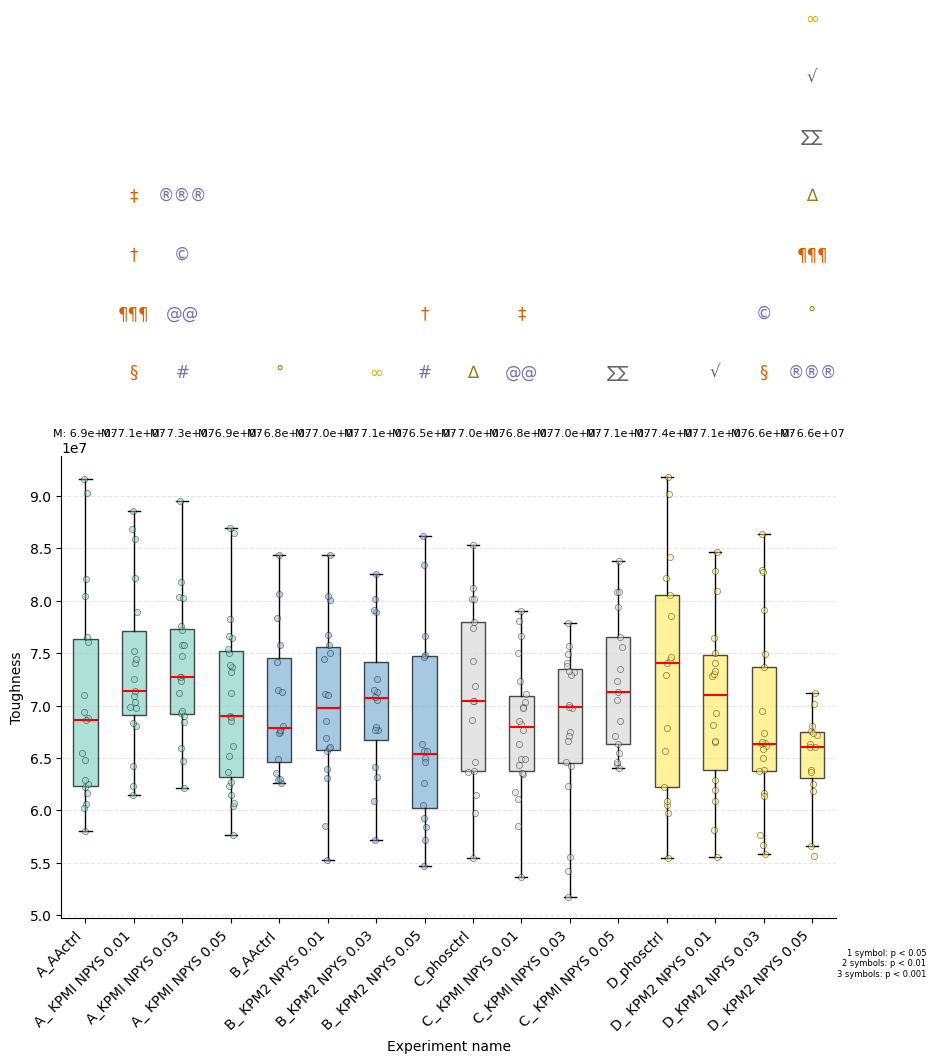

In [12]:
header = 'TOUGHNESS'
ymin = None
ymax = None
fig, ax, removed = plotting.create_boxplot(df_merged, header, ymin, ymax)
#save removed data
removed.to_csv(f"{savepath}{header}_removed.csv", index=True)
print(f"{len(removed)} removed data points for {header}")
# plot
fig.savefig(f"{savepath}{header}.png")
plt.show()

Statistical significance between A_ KPMI NPYS 0.01 and D_ KPM2 NPYS 0.05: p = 0.0440
Statistical significance between D_ KPM2 NPYS 0.01 and D_ KPM2 NPYS 0.05: p = 0.0374
0 removed data points for ELASTIC GRADIENT


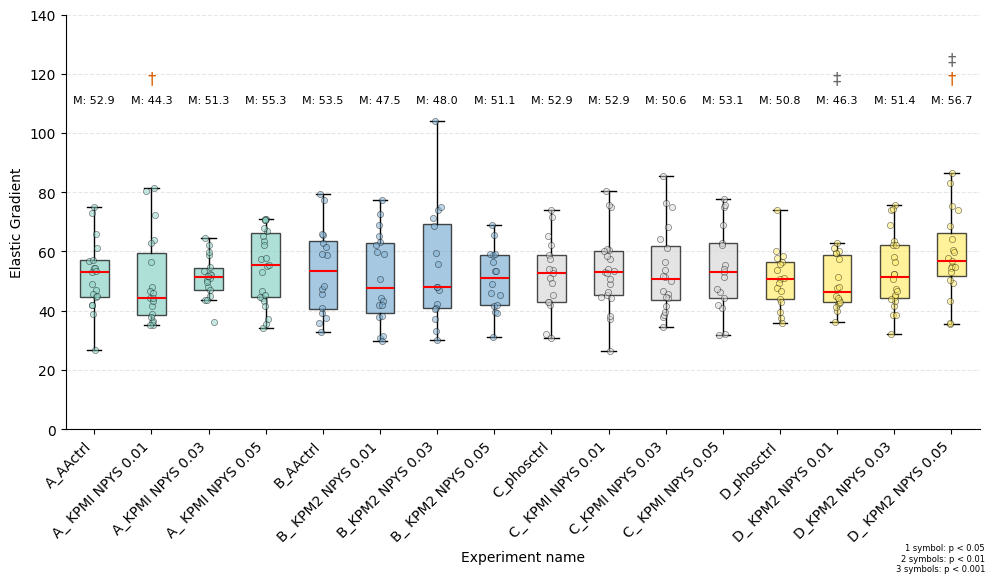

In [13]:
header = 'ELASTIC GRADIENT'
ymin = 0
ymax =  140
fig, ax, removed = plotting.create_boxplot(df_merged, header, ymin, ymax)
#save removed data
removed.to_csv(f"{savepath}{header}_removed.csv", index=True)
print(f"{len(removed)} removed data points for {header}")
# plot
fig.savefig(f"{savepath}{header}.png")
plt.show()

Statistical significance between A_ KPMI NPYS 0.05 and D_KPM2 NPYS 0.03: p = 0.0345
Statistical significance between B_AActrl and D_KPM2 NPYS 0.03: p = 0.0415
Statistical significance between B_ KPM2 NPYS 0.01 and C_ KPMI NPYS 0.05: p = 0.0496
Statistical significance between C_phosctrl and D_KPM2 NPYS 0.03: p = 0.0345
Statistical significance between C_ KPMI NPYS 0.05 and D_KPM2 NPYS 0.03: p = 0.0161
0 removed data points for ELASTIC EMOD


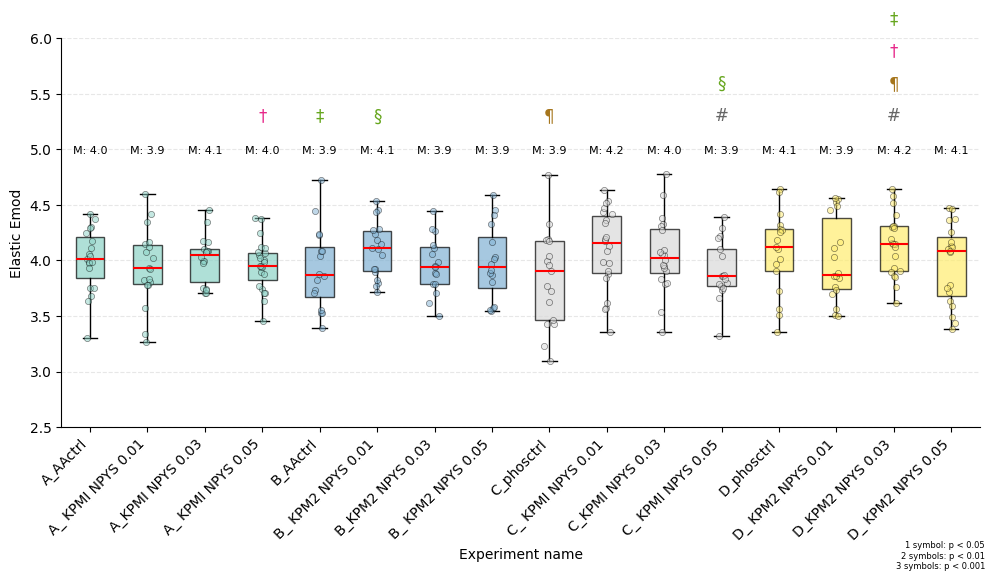

In [14]:
header = 'ELASTIC EMOD'
ymin = 2.5
ymax =  6.0
fig, ax, removed = plotting.create_boxplot(df_merged, header, ymin, ymax)
#save removed data
removed.to_csv(f"{savepath}{header}_removed.csv", index=True)
print(f"{len(removed)} removed data points for {header}")
# plot
fig.savefig(f"{savepath}{header}.png")
plt.show()

### Scatter plots with correlation

In [15]:
df_merged.columns

Index(['RECORD', 'CROSS-SECTIONAL AREA', 'MEAN DIAMETER', 'MAX DIAMETER',
       'MIN DIAMETER', 'ELASTIC EMOD', 'ELASTIC GRADIENT', 'ELASTIC EXT',
       'ELASTIC STRESS', 'PLATEAU LOAD', 'PLATEAU STRESS', 'LOAD 15%',
       'STRESS 15%', 'WORK 15%', 'LOAD 25%', 'STRESS 25%', 'WORK 25%',
       'YIELD EXT', 'POSTYIELD GRADIENT', 'BREAK EXT', 'BREAK LOAD',
       'BREAK STRESS', 'TOTAL WORK', 'TOUGHNESS', 'Name'],
      dtype='object', name=0)

Plot saved to: /Users/michaelmoret/Library/CloudStorage/GoogleDrive-michael@externa.bio/.shortcut-targets-by-id/1BdUNsBjDh5Gee_76jCiKB1C_CwG0ercP/Pulling data/24-12-12/triple/plots/correlation_plot/scatter_MEAN DIAMETER_vs_ELASTIC EMOD.png


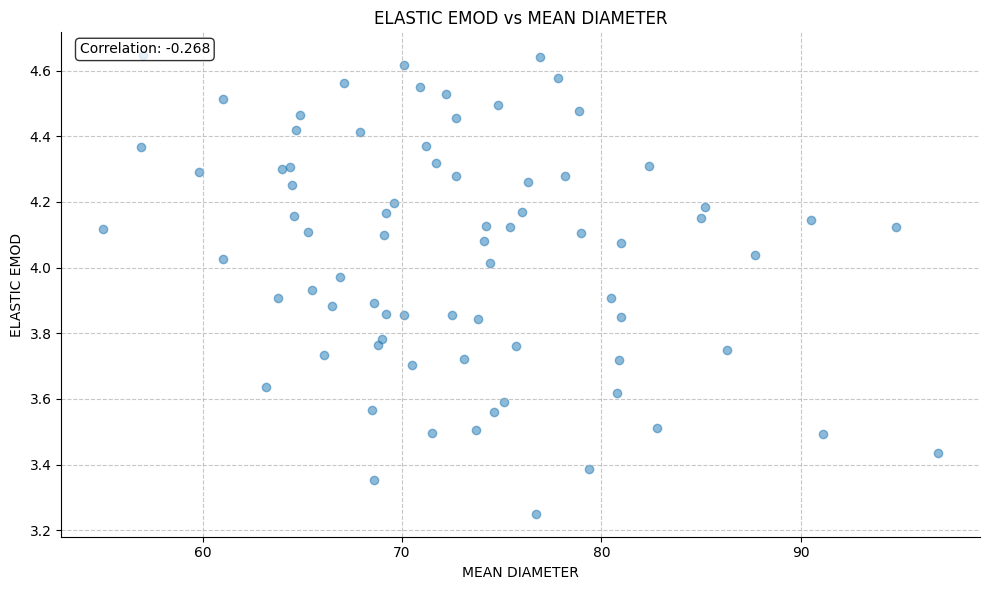

In [16]:
y_col = 'ELASTIC EMOD'
x_col = 'MEAN DIAMETER'
savedir = f"{savepath}correlation_plot/"
plt = plotting.create_scatter_plot(df, x_col, y_col, savedir)

Plot saved to: /Users/michaelmoret/Library/CloudStorage/GoogleDrive-michael@externa.bio/.shortcut-targets-by-id/1BdUNsBjDh5Gee_76jCiKB1C_CwG0ercP/Pulling data/24-12-12/triple/plots/correlation_plot/scatter_MAX DIAMETER_vs_ELASTIC EMOD.png


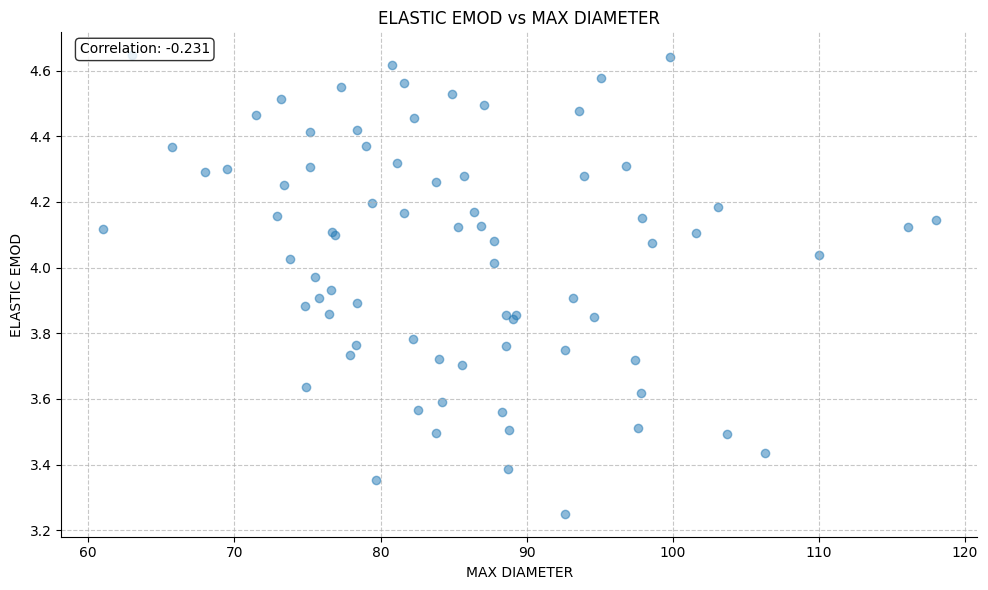

In [17]:
y_col = 'ELASTIC EMOD'
x_col = 'MAX DIAMETER'
savedir = f"{savepath}correlation_plot/"
plt = plotting.create_scatter_plot(df, x_col, y_col, savedir)

Plot saved to: /Users/michaelmoret/Library/CloudStorage/GoogleDrive-michael@externa.bio/.shortcut-targets-by-id/1BdUNsBjDh5Gee_76jCiKB1C_CwG0ercP/Pulling data/24-12-12/triple/plots/correlation_plot/scatter_MIN DIAMETER_vs_ELASTIC EMOD.png


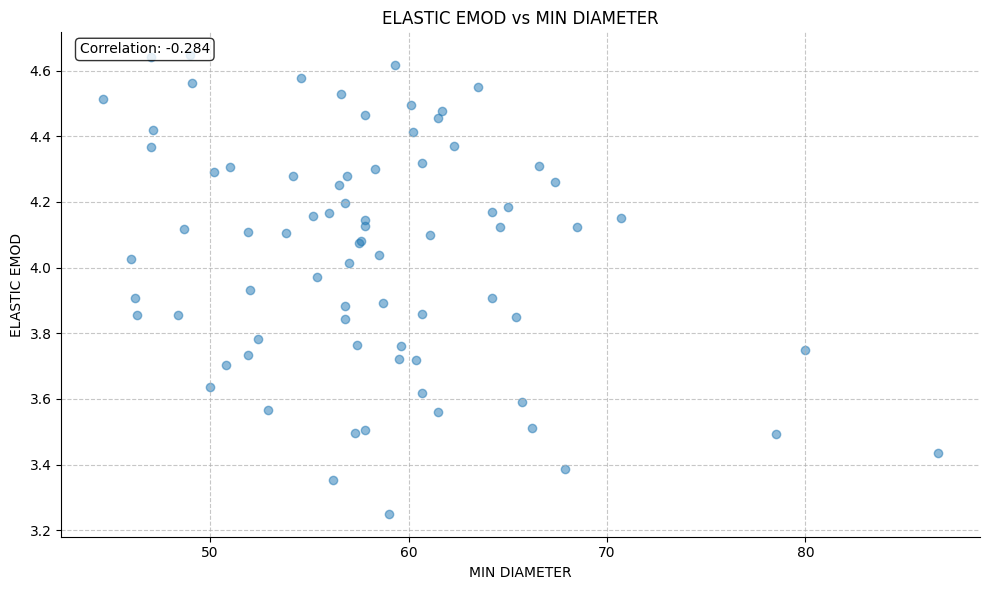

In [18]:
y_col = 'ELASTIC EMOD'
x_col = 'MIN DIAMETER'
savedir = f"{savepath}correlation_plot/"
plt = plotting.create_scatter_plot(df, x_col, y_col, savedir)

Plot saved to: /Users/michaelmoret/Library/CloudStorage/GoogleDrive-michael@externa.bio/.shortcut-targets-by-id/1BdUNsBjDh5Gee_76jCiKB1C_CwG0ercP/Pulling data/24-12-12/triple/plots/correlation_plot/scatter_MEAN DIAMETER_vs_BREAK STRESS.png


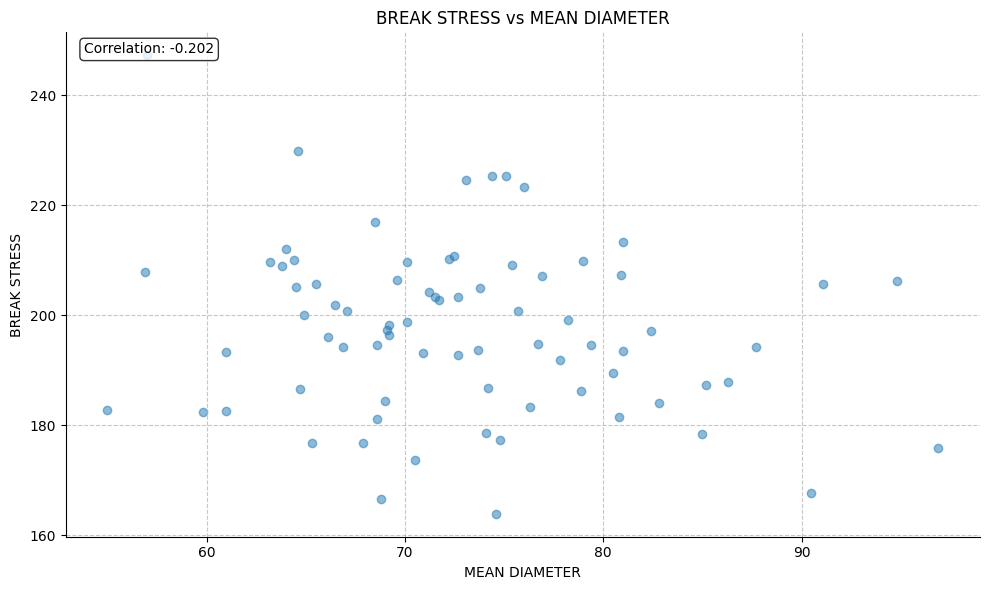

In [19]:
y_col = 'BREAK STRESS'
x_col = 'MEAN DIAMETER'
savedir = f"{savepath}correlation_plot/"
plt = plotting.create_scatter_plot(df, x_col, y_col, savedir)

Plot saved to: /Users/michaelmoret/Library/CloudStorage/GoogleDrive-michael@externa.bio/.shortcut-targets-by-id/1BdUNsBjDh5Gee_76jCiKB1C_CwG0ercP/Pulling data/24-12-12/triple/plots/correlation_plot/scatter_MAX DIAMETER_vs_BREAK STRESS.png


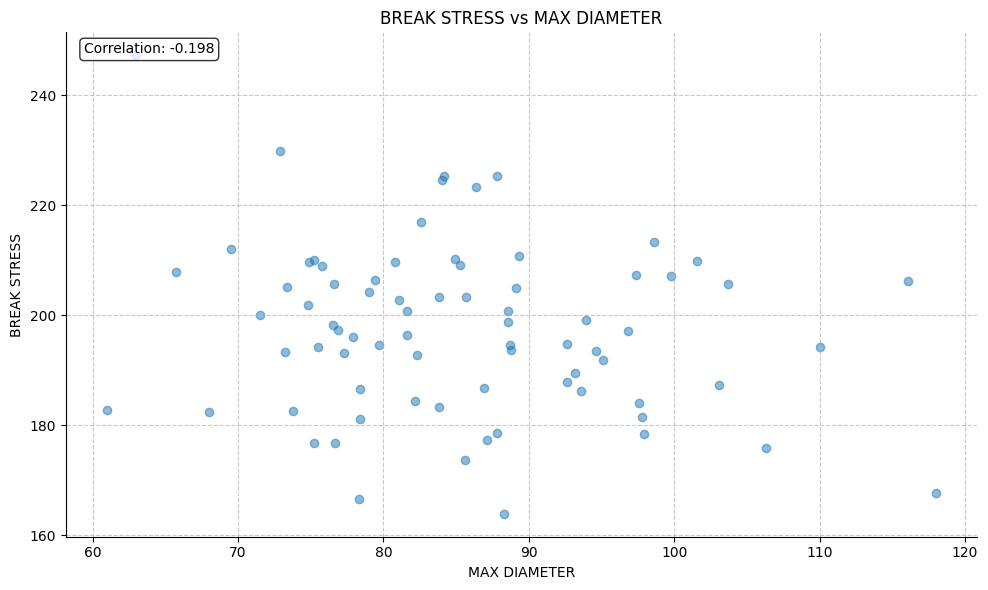

In [20]:
y_col = 'BREAK STRESS'
x_col = 'MAX DIAMETER'
savedir = f"{savepath}correlation_plot/"
plt = plotting.create_scatter_plot(df, x_col, y_col, savedir)

Plot saved to: /Users/michaelmoret/Library/CloudStorage/GoogleDrive-michael@externa.bio/.shortcut-targets-by-id/1BdUNsBjDh5Gee_76jCiKB1C_CwG0ercP/Pulling data/24-12-12/triple/plots/correlation_plot/scatter_MIN DIAMETER_vs_BREAK STRESS.png


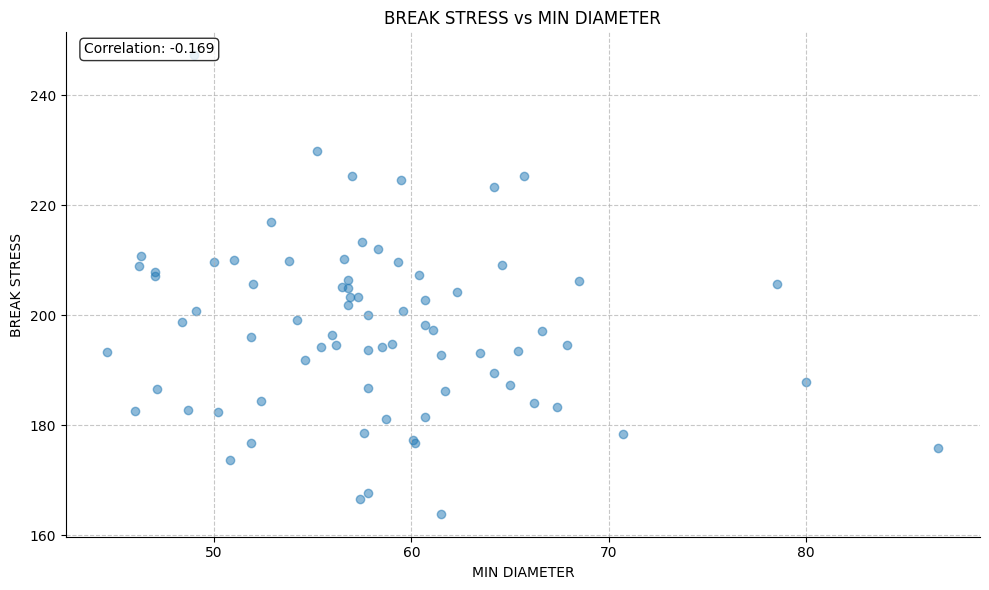

In [21]:
y_col = 'BREAK STRESS'
x_col = 'MIN DIAMETER'
savedir = f"{savepath}correlation_plot/"
plt = plotting.create_scatter_plot(df, x_col, y_col, savedir)